In [1]:
pip install vega_datasets


Note: you may need to restart the kernel to use updated packages.


In [64]:
from vega_datasets import data
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np

In [3]:
df = data.sf_temps()
df.head()


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


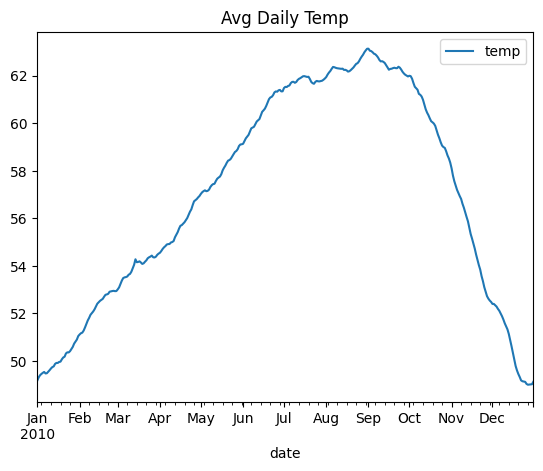

In [78]:
df.resample('D').mean().temp.plot(label = 'temp')
plt.title('Avg Daily Temp')
plt.legend()
plt.show()

# 2. Write the code necessary to visualize the minimum temperature over time.


In [8]:
df.resample('D').min()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


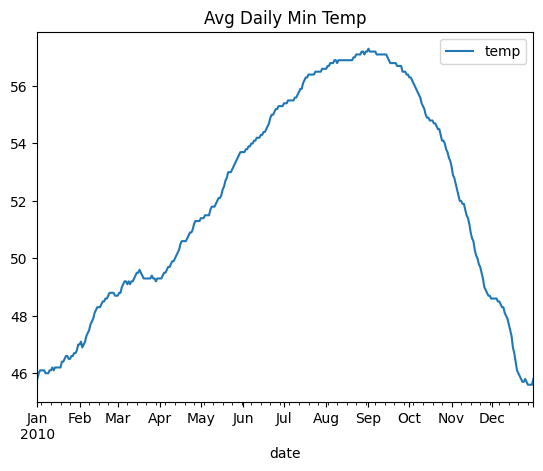

In [79]:
df.resample('D').min().temp.plot(label = 'temp')
plt.title('Avg Daily Min Temp')
plt.legend()
plt.show()

# 3. Write the code necessary to visualize the maximum temperature over time.


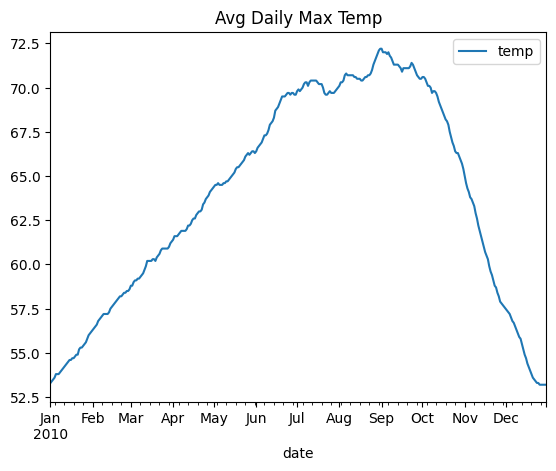

In [80]:
df.resample('D').max().temp.plot(label='temp')
plt.title('Avg Daily Max Temp')
plt.legend()
plt.show()


# 4. Which month is the coldest, on average?


In [86]:
df.resample('M').mean().temp

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

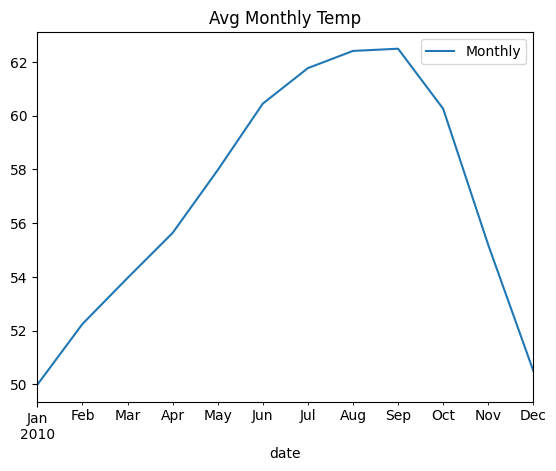

 Jan with an avg temp of 49.98413978494623


In [84]:
df.resample('M').mean().temp.plot(label='Monthly')
plt.title('Avg Monthly Temp')
plt.legend()
plt.show()
print(f" Jan with an avg temp of {df.resample('M').mean().temp.min()}")

# 5. Which month has the highest average temperature?


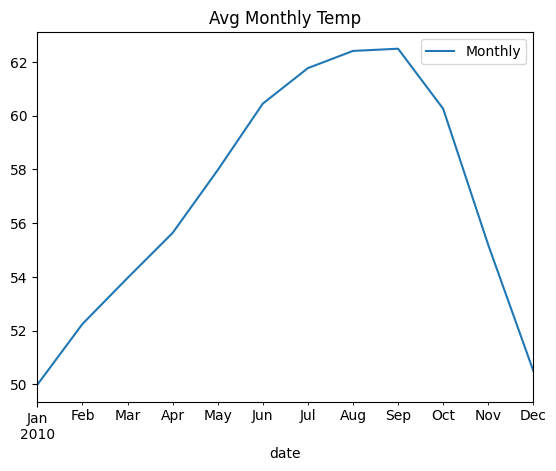

 Jan with an avg temp of 62.48708333333333


In [12]:
df.resample('M').mean().temp.plot(label='Monthly')
plt.title('Avg Monthly Temp')
plt.legend()
plt.show()
print(f" Jan with an avg temp of {df.resample('M').mean().temp.max()}")

# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [13]:
daily_min_max = df.resample('D').agg(['min', 'max']).temp
daily_min_max.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [14]:
daily_min_max['daily_change'] = daily_min_max['max'] - daily_min_max['min']


In [15]:
daily_min_max.sort_values('daily_change', ascending= False ).head()

,min,max,daily_change
date,,,
2010-08-31,57.2,72.2,15.0
2010-09-01,57.3,72.2,14.9
2010-08-30,57.2,72.1,14.9
2010-08-29,57.1,71.9,14.8
2010-09-02,57.2,72.0,14.8



- August has the highest daily chang of temps

# 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.



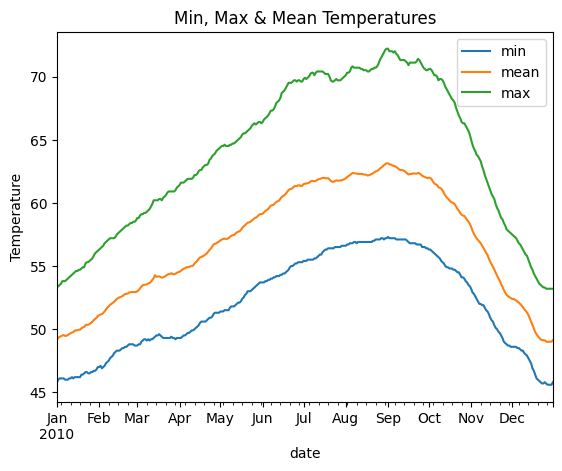

In [87]:
#resample temperatures by day- get min max and average
df.temp.resample('D').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Max & Mean Temperatures')
plt.ylabel('Temperature')
plt.show()


# Use the above dataset for the following exercises:


In [17]:
seattle_data = data.seattle_weather()
seattle_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [18]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [19]:
type(seattle_data.index)

pandas.core.indexes.range.RangeIndex

In [20]:
seattle_data.set_index('date').sort_index().head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


 # 1. Which year and month combination has the highest amount of precipitation?


In [21]:
# Convert the 'date' column to datetime type 
seattle_data['date'] = pd.to_datetime(seattle_data['date'])

# Set the 'date' column as the index
seattle_data.set_index('date', inplace=True)


In [22]:
# Resample by month and sum the precipitation
monthly_precipitation = seattle_data['precipitation'].resample('M').sum()

# Find the index (year and month combination) of the max precipitation
max_precipitation_date = monthly_precipitation.idxmax()

year, month = max_precipitation_date.year, max_precipitation_date.month


In [88]:
print(f" the highest precipitation is {year}-{month}.")


 the highest precipitation is 2015-December.


# 2. Visualize the amount of monthly precipitation over time.


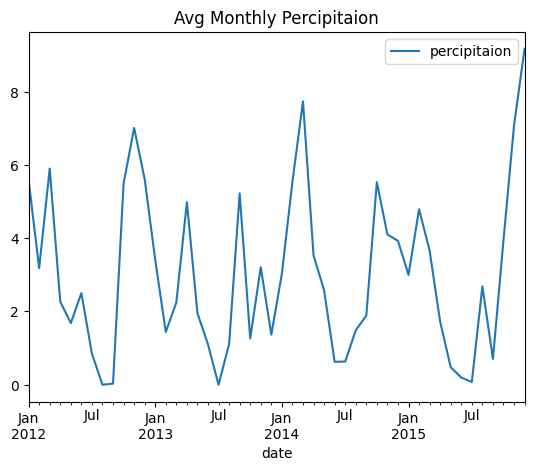

In [24]:
seattle_data.resample('M').precipitation.mean().plot(label = 'percipitaion')
plt.title('Avg Monthly Percipitaion')
plt.legend()
plt.show()

# 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


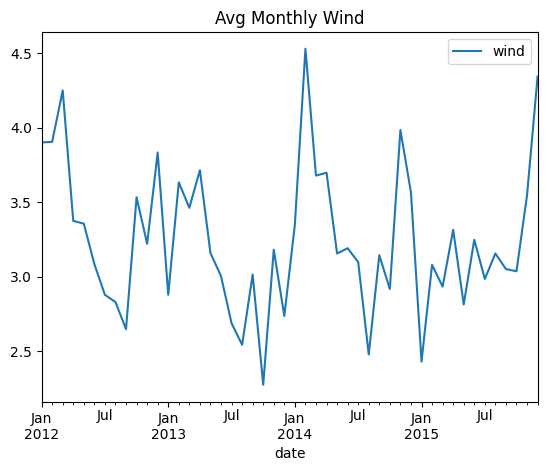

In [25]:
seattle_data.resample('M').wind.mean().plot(label = 'wind')
plt.title('Avg Monthly Wind')
plt.legend()
plt.show()

# 4. Which year-month combination is the windiest?


In [26]:
seattle_data.resample('M').wind.mean().max()


4.5285714285714285

# 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [27]:
sunniest_year = seattle_data[(seattle_data.weather == 'sun')].resample('Y').size()
sunniest_year.idxmax().year

2014

# 6. In which month does it rain the most?


In [28]:
#create a column for days that are sunny
seattle_data['rainy_day'] = seattle_data.weather == 'rain'
seattle_data.head(2)

,precipitation,temp_max,temp_min,wind,weather,rainy_day
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,True


In [29]:
#create column to identify month!
seattle_data['month'] = seattle_data.index.month_name()
seattle_data.head(2)

,precipitation,temp_max,temp_min,wind,weather,rainy_day,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,January
2012-01-02,10.9,10.6,2.8,4.5,rain,True,January


In [30]:
#resample by month 
#this only gives me monthly totals individuals
d= seattle_data.rainy_day.resample('M').sum().sort_values(ascending=False)

In [33]:

seattle_data.groupby('month').rainy_day.sum().sort_values(ascending=False)


month
February     40
March        37
January      35
November     25
December     23
April        20
October      20
June         19
May          16
July         14
August        6
September     4
Name: rainy_day, dtype: int64

- Month that has the most days with rain is February

# 7. Which month has the most number of days with a non-zero amount of precipitation?


In [60]:
# create a mask for days with non-zero percipitation
non_zero = seattle_data['precipitation']>0
non_zero.head(2)

date
2012-01-01    False
2012-01-02     True
Name: precipitation, dtype: bool

In [90]:

non_zero.resample('m').sum().idxmax().strftime('%b %y')


'Dec 12'

# Use the below dataset for the following exercises:



In [62]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [69]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [70]:
#check the index- should be date
type(flights.index)

pandas.core.indexes.range.RangeIndex

In [71]:
#must complete step 2&3 (set date as index and sort)
flights = flights.set_index('date').sort_index()

In [72]:
#confirm the change
type(flights.index)

pandas.core.indexes.datetimes.DatetimeIndex

# 1. Convert any negative delays to 0.


In [73]:
#Correct all negative delays to 0 using np.where
flights['delay'] = np.where(flights['delay'] < 0, 0, flights['delay'])
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


# 2. Which hour of the day has the highest average delay?


In [76]:
#Create an hour column
flights['hour'] = flights.index.strftime('%H')
flights.head(2)

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,00
2001-01-01 06:20:00,0,491,BNA,MCI,06


In [77]:
#idxmax to return the hour
flights.groupby('hour').delay.mean().idxmax()

'03'

# 3. Does the day of the week make a difference in the delay amount?


In [ ]:
flights.